Gaussian-SVM-Cross 
(classifying 2D points, allowing for them to be linearly separable in higher dimension)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC


Plotting the points in 2D space

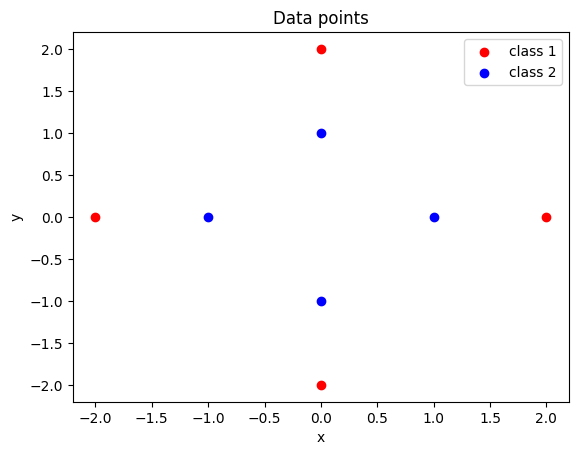

In [2]:

all_data = np.array([[-2, 0], [0, 2], [0, -2], [2, 0], [-1, 0], [1, 0], [0, 1], [0, -1]])

# plot these points in 2D
x_coord_class1 = all_data[0:4, 0]
y_coord_class1 = all_data[0:4, 1]
x_coord_class2 = all_data[4:8, 0]
y_coord_class2 = all_data[4:8, 1]

plt.scatter(x_coord_class1, y_coord_class1, color='red', label='class 1')
plt.scatter(x_coord_class2, y_coord_class2, color='blue', label='class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.legend(loc='upper right')
plt.show()






plot the decision boundary in 3D space with the data points transformed to a higher dimension

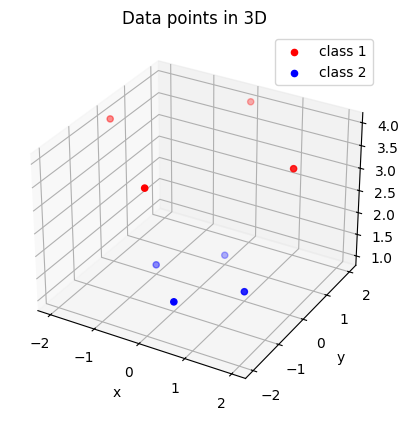

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the x and y points of the data
def Phi(x,y):
    return x**2 + y**2

def plot3D():
    z_1 = Phi(x_coord_class1, y_coord_class1)
    z_2 = Phi(x_coord_class2, y_coord_class2)
    ax.scatter(x_coord_class1, y_coord_class1, z_1, color='red', label='class 1')
    ax.scatter(x_coord_class2, y_coord_class2, z_2, color='blue', label='class 2')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Data points in 3D')
    ax.legend(loc='upper right')


  
   
plot3D()
plt.show()




Plot the decision region using the Gaussian SVM Kernel with the 3D plot

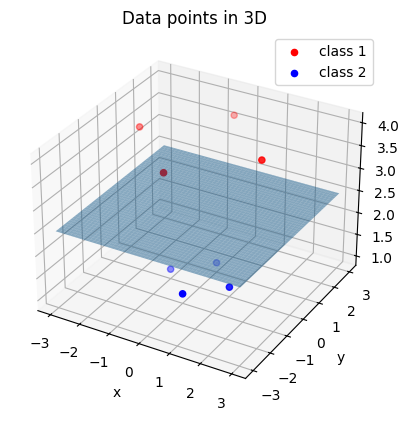

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Decision region surface for SVM')

svm = LinearSVC(C=10, dual=True, max_iter=10000)

# fit the SVM to the data with Phi applied
svm.fit(Phi(all_data[:,0], all_data[:,1]).reshape(-1, 1), [1, 1, 1, 1, -1, -1, -1, -1])

# plot the decision region surface for the SVM
svm.coef_ = svm.coef_.reshape(-1, 1)
slope = - (svm.coef_[0])
y_intercept = - (svm.intercept_[0])
x_vals = np.linspace(-3, 3, 50)
y_vals = np.linspace(-3, 3, 50)
x, y = np.meshgrid(x_vals, y_vals)

# z = w1x + w2y + b
z = (-svm.coef_[0] * x - svm.coef_[0] * y - svm.intercept_[0])

ax.plot_surface(x, y, np.full_like(z, 2.5), alpha=0.5)

plot3D()